In [2]:
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l
from d2l_common import DataModule

In [41]:
class FasionMNIST(DataModule):
    """The Fashion-MNIST dataset."""

    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose(
            [transforms.Resize(resize), transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(
            root='../data', train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(
            root='../data', train=False, transform=trans, download=True)
        self.num_workers = 1
        self.batch_size = batch_size

    def text_labels(self, indices):
        """Return text labels."""
        labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                  'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
        return [labels[int(i)] for i in indices]

    def get_dataloader(self, train):
        data = self.train if train else self.val
        return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train, num_workers=self.num_workers)
    
    def visualize(self, batch, nrows=1, ncols=8, labels=[]):
        X, y = batch
        if not labels:
            labels = self.text_labels(y)
        d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)

In [42]:
data = FasionMNIST()
len(data.train),len(data.val)

(60000, 10000)

In [37]:
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

torch.Size([64, 1, 28, 28]) torch.float32 torch.Size([64]) torch.int64


In [38]:
tic = time.time()
for X, y in data.train_dataloader():
    continue
f'{time.time() - tic:.2f} sec'

'9.60 sec'

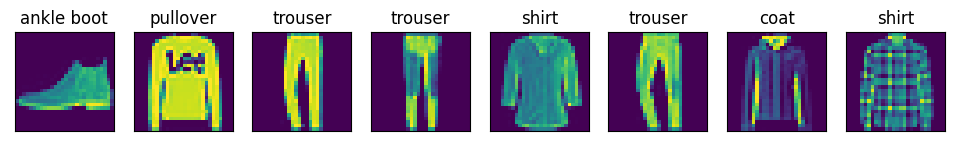

In [43]:
batch = next(iter(data.val_dataloader()))
data.visualize(batch)

In [30]:
data.train[0][0].shape
torch.cat((data.train[0][0],data.train[1][0])).shape
# data.train[0][0]
# torch.cat

# torch.cat()


ValueError: only one element tensors can be converted to Python scalars

In [48]:
y_hat = torch.randn(10,2)
y_hat.argmax(axis=1)

tensor([1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [49]:
from d2l_common import Module
import matplotlib.pyplot as plt


class Classifier(Module):
    def __init__(self):
        super().__init__()
        self.acc = []

    def validate_step(self, batch):
        y_hat = self.forward(batch[0])
        self.validate_loss.append(self.loss(y_hat, batch[1]).item())
        self.acc.append(self.accuracy(y_hat, batch[1]))

    def accuracy(self, y_hat, y, averaged=True):
        cmp = y_hat.argmax(axis=1) == y
        return cmp.mean() if averaged else cmp

    def plot(self):
        plt.plot(self.train_loss, label='train')
        plt.plot(self.validate_loss, label='validate')
        plt.plot(self.acc, label='accuracy')
        plt.xlabel = 'epoch'
        plt.ylabel = 'loss & accuracy'
        plt.legend()

In [56]:
def softmax(X):
    x_exp = X.exp()
    partition = x_exp.sum(1, keepdims=True)
    print(partition.shape,partition)
    return x_exp / partition

x = torch.randn(10,5)
softmax(x).sum(1)

torch.Size([10, 1]) tensor([[ 8.0076],
        [ 8.8098],
        [ 3.5842],
        [10.4772],
        [ 7.8680],
        [ 6.5524],
        [10.7869],
        [ 5.0210],
        [ 8.0778],
        [10.0057]])


tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])